In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

i-rbf-net-400-3
16
78.1396551796
e-rbf-net-400-3
0
0
i-rbf-cost-400-3
16
78.1396551796
e-rbf-cost-400-3
0
0
i-rbf-net-300-3
16
78.1396551796
e-rbf-net-300-3
0
0
i-rbf-cost-300-3
16
78.1396551796
e-rbf-cost-300-3
0
0
i-rbf-net-200-3
16
78.1396551796
e-rbf-net-200-3
12
95.18747948343749
i-rbf-cost-200-3
16
78.1396551796
e-rbf-cost-200-3
12
97.446909279525
i-rbf-net-106-3
16
78.1396551796
e-rbf-net-106-3
12
96.30542256281248
i-rbf-cost-106-3
16
78.1396551796
e-rbf-cost-106-3
12
97.4164133203125


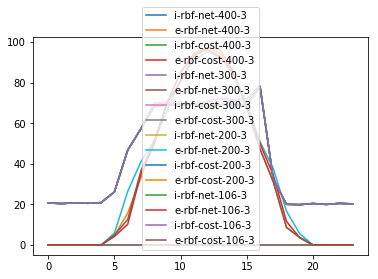

In [27]:


opt_methods  = ['rbf-net','rbf-cost']
prices       = ['400','300','200','106']
building_ids = [0,1,2,3]

base_path="../"

i_s=len(prices)
j_s=len(opt_methods)
buil_id=3
peak_imported_energy_hourly = pd.DataFrame()

for i in range(i_s):
    for j in range(j_s):
        ehub_file   = base_path+'ehub/output_ehub_excel/' + "{}-{}-{}/".format(opt_methods[j],prices[i],building_ids[buil_id]) + 'bc_ehub_results.xlsx'

        # imported energy with datetime
        imported_energy=pd.read_excel(ehub_file,sheet_name='energy_imported')
        date_rng = pd.date_range(start='1/1/2018', end='1/1/2019', freq='H')
        imported_energy['datetime'] = date_rng[:-1]
        imported_energy=imported_energy.set_index('datetime')
        #print(imported_energy.head())

        # exported energy with datetime

        exported_energy=pd.read_excel(ehub_file,sheet_name='energy_exported')
        exported_energy['datetime'] = date_rng[:-1]
        exported_energy=exported_energy.set_index('datetime')
        #print(exported_energy.head())

        plt.plot(imported_energy.groupby(imported_energy.index.hour).max()['Grid'].values, label='i-{}-{}-{}'.format(opt_methods[j],prices[i],building_ids[buil_id]))
        plt.plot(exported_energy.groupby(exported_energy.index.hour).max()['GreenElec'].values, label='e-{}-{}-{}'.format(opt_methods[j],prices[i],building_ids[buil_id]))
        print('i-{}-{}-{}'.format(opt_methods[j],prices[i],building_ids[buil_id]))
        print(imported_energy.groupby(imported_energy.index.hour).max()['Grid'].values.argmax())
        print(imported_energy.groupby(imported_energy.index.hour).max()['Grid'].values.max())
        print('e-{}-{}-{}'.format(opt_methods[j],prices[i],building_ids[buil_id]))
        print(exported_energy.groupby(exported_energy.index.hour).max()['GreenElec'].values.argmax())
        print(exported_energy.groupby(exported_energy.index.hour).max()['GreenElec'].values.max())

plt.legend()
plt.show()


In [8]:
imported_energy.groupby(imported_energy.index.hour).max()['Grid'].values

array([ 309.58273042,  309.4600052 ,  309.60314952,  314.48486394,
        351.35070242,  592.39323729,  701.46760209, 1260.46748779,
       1246.88548892, 1173.20076417, 1202.89545399, 1160.41794558,
       1225.60311188, 1243.0731284 , 1305.16054389, 1355.32650078,
       1274.15884723, 1044.10366499,  994.41608856,  821.3828634 ,
        804.00865435,  560.1892783 ,  349.35697418,  299.992215  ])

8761